## 0. 모델 훈련

머신러닝 모델의 작동원리를 이해해야하는 이유

* 최적의 모델을 선정  
* 올바른 훈련알고리즘 선정  
* 최적의 하이퍼파라미터 찾기  

가 가능해진다.

 `비용 함수 (Cost Function)`

선형 회귀의 비용 함수 $J(\theta)$는 다음과 같이 정의된다:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

이를 행렬 형태로 표현하면:

$$J(\theta) = \frac{1}{2m} \| X \theta - y \|^2$$

 `정규방정식 (Normal Equation)`

비용 함수 $J(\theta)$ 를 최소화하는 $\theta$ 를 찾기 위해, 정규방정식은 다음과 같이 도출된다:  
(비용함수를 $\theta$로 미분함.)

$$X^T X \theta = X^T y$$

이를 풀어서 최적의 $ \theta $를 구하면:

$$\theta = (X^T X)^{-1} X^T y$$

## 1. 정규방정식과 특잇값분해를 이용한 선형회귀

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# 한글 글꼴 설정 (여기서는 'Malgun Gothic'을 사용)
plt.rcParams['font.family'] = 'D2Coding'

In [30]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) #잡음을 일부로 더해줌.

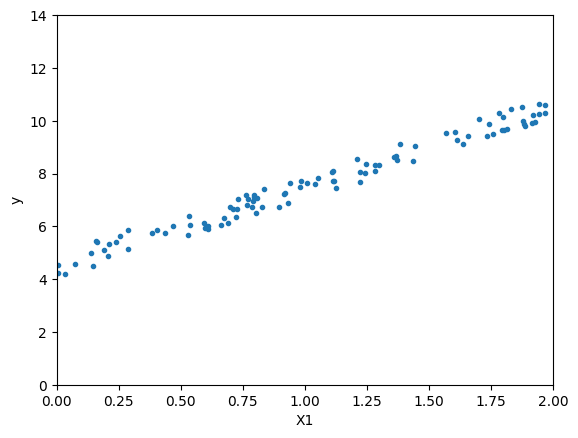

In [36]:
plt.plot(X, y, '.')

plt.xlabel('X1')
plt.ylabel('y')

plt.xlim(0, 2)
plt.ylim(0, 14)

plt.show()

정규방정식을 이용하여 $\theta$ 를 계산해보자.

In [34]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [35]:
theta_best

array([[4.49200748],
       [2.99841693]])

In [38]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.49200748],
       [10.48884135]])

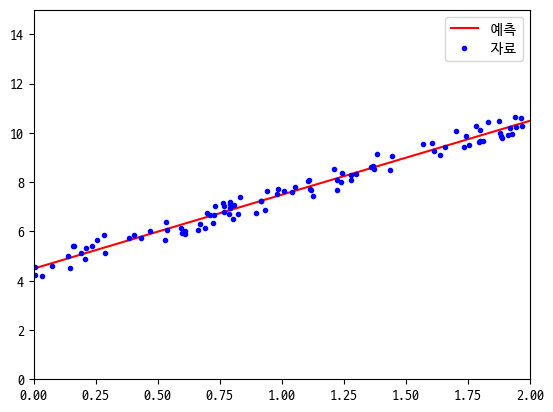

In [53]:
plt.plot(X_new, y_predict, 'r-', label='예측')
plt.plot(X, y, "b.", label='자료')
plt.axis([0,2, 0,15])
plt.legend(loc="best")
plt.show()

사이킷런에서 지원하는 선형회귀를 이용해보자.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [57]:
lin_reg.intercept_, lin_reg.coef_

(array([4.49200748]), array([[2.99841693]]))

In [58]:
lin_reg.predict(X_new)

array([[ 4.49200748],
       [10.48884135]])

LinearRegression 클래스는 scipy.linalg.lstsq()메서드를 기반으로한다. 이 메서드를 직접 호출해도된다.

In [59]:
theta_best_svd, residuals, ranks, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.49200748],
       [2.99841693]])

In [60]:
np.linalg.pinv(X_b).dot(y)

array([[4.49200748],
       [2.99841693]])

정규방정식보다 SVD 방식을 이용하면 계산 복잡도를 비교적 낮출 수 있다. 하지만 특성이 매우 많고 훈련샘플이 많아도 괜찮을 것인가....

## 3. 경사하강법을 이용한 선형회귀

### 3.1 배치경사하강법
매 iter마다 전체의 훈련세트에 대해서 계산이됨.

$\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \nabla_{\theta} J(\theta)$

- $\theta$: 최적화하려는 변수(모델의 매개변수)
- $J(\theta)$: $\theta$에 대한 손실 함수 또는 비용 함수
- $\nabla_{\theta} J(\theta)$: $\theta$에 대한 손실 함수의 기울기(그레디언트언트 벡터)
- $\alpha$: 학습률(learning rate)로, 매개변수 업데이트의 크기를 조절하는 상수

$\nabla_{\theta} J(\theta) = \left[ \frac{\partial J(\theta)}{\partial \theta_1}, \frac{\partial J(\theta)}{\partial \theta_2}, \dots, \frac{\partial J(\theta)}{\partial \theta_n} \right]^T$ $=\frac{2}{m} X^T (X\theta - y)$

In [67]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화
print(theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

[[-1.5962442 ]
 [-1.09815797]]


array([[4.49200748],
       [2.99841693]])

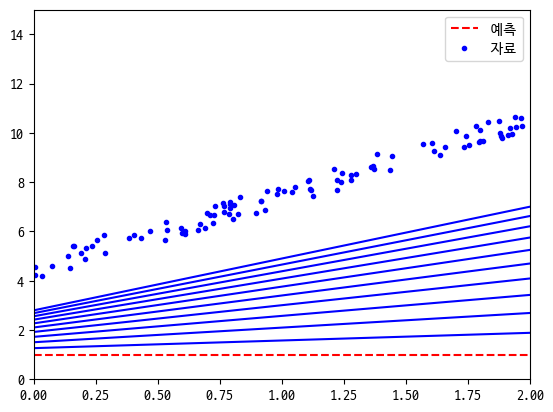

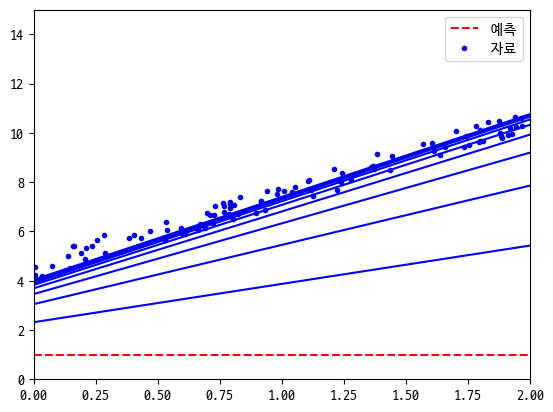

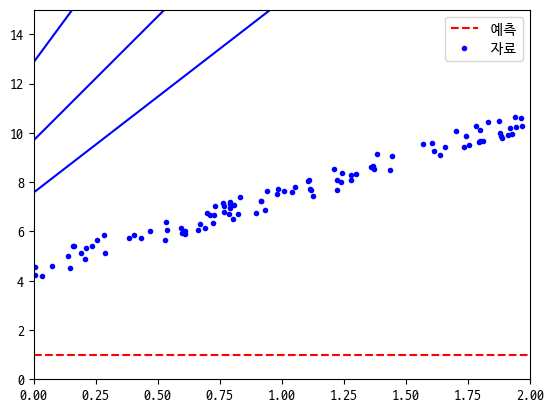

In [93]:
def plot_gd(eta):
    n_iterations = 10

    theta = np.array([[1],[0]]) # 무작위 초기화

    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]

    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, 'r--', label='예측')
    plt.plot(X, y, "b.", label='자료')
    plt.axis([0,2, 0,15])
    plt.legend(loc="best")
    

    for _ in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        plt.plot(X_new, X_new_b.dot(theta), 'b')

plot_gd(0.02)
plt.show()

plot_gd(0.1)
plt.show()

plot_gd(0.5)
plt.show()

## 3.2 확률적 경사하강법


매 스탭마다 훈련데이터 전체를 학습하는 것이 아닌 임의의 한개의 데이터에 대해서 계산을 한다.

array([[4.48314467],
       [3.02154915]])

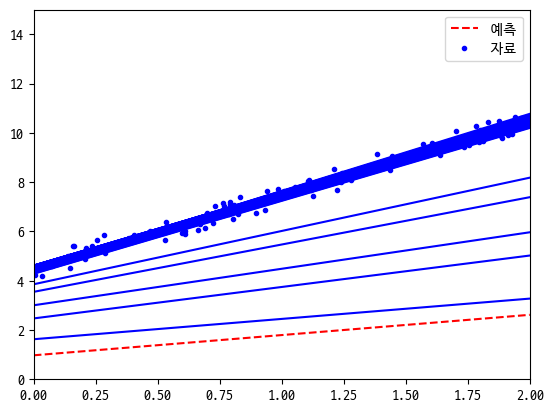

In [108]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파리미터
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #무작위 초기화

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, 'r--', label='예측')
plt.plot(X, y, "b.", label='자료')
plt.axis([0,2, 0,15])
plt.legend(loc="best")

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b')

theta

사이킷런의 SGD방식
* max_iter : 에포크 수
* tol : 최적화 종료 기준이 되는 허용 오차
* penalty : 규제
* eta0 : 학습률

In [110]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [115]:
sgd_reg.intercept_, sgd_reg.coef

(array([4.46658222]), array([3.00361871]))

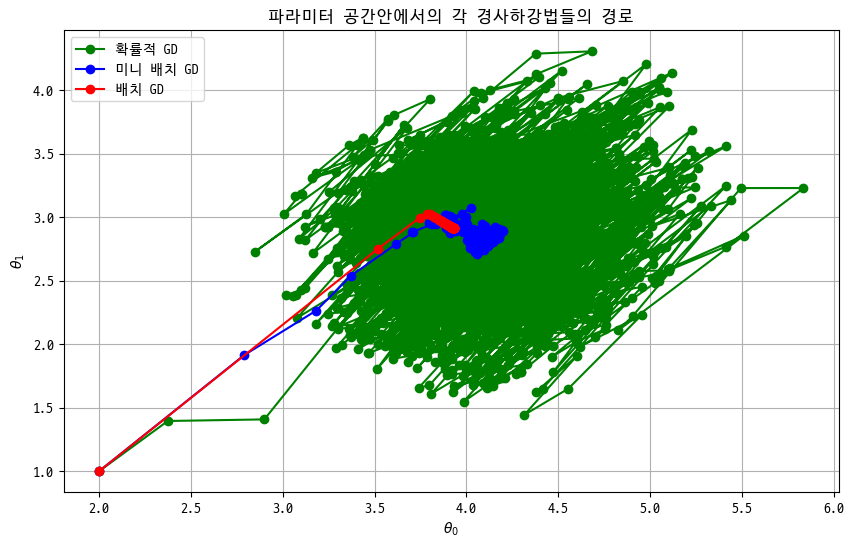

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # 잡음 추가

# 초기 파라미터 설정
theta = np.random.randn(2, 1)  # 무작위 초기화
X_b = np.c_[np.ones((100, 1)), X]  # 절편 추가

# 학습률 및 반복 횟수
learning_rate = 0.1
n_iterations = 100
m = 50

# 배치 경사하강법
theta_path_bgd = []
theta = [[2],[1]]  # 무작위 초기화
theta_path_bgd.append(theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    theta_path_bgd.append(theta)

# 확률적 경사하강법
theta_path_sgd = []
theta = [[2],[1]]  # 무작위 초기화
theta_path_sgd.append(theta)
for iteration in range(n_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)

# 미니배치 경사하강법
theta_path_mgd = []
theta = [[2],[1]]  # 무작위 초기화
theta_path_mgd.append(theta)
minibatch_size = 20
for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients
        theta_path_mgd.append(theta)

# 경사 하강법 경로 시각화
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(10, 6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "go-", label="확률적 GD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "bo-", label="미니 배치 GD")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "ro-", label="배치 GD")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("파라미터 공간안에서의 각 경사하강법들의 경로")
plt.grid(True)
plt.show()

| 알고리즘                        | 샘플이 많을때 | 외부 메모리 학습 지원 | 특성이 많을 때 | 하이퍼파라미터 수 | 스케일 조정 필요 | 사이킷런 모델 지원 |
|---------------------------------|----------------|---------------------|------------------|-----------------|------------------|------------------|
| 정규방정식 (Normal Equation)    | 빠름         | 지원 안함              | 느림           | 없음              | 없음             | 사용 안함         |
| SVD (Singular Value Decomposition)| 빠름             | 지원 안함              | 느림               | 없음              | 없음             | `LinearRegression`         |
| 배치 경사하강법 (Batch Gradient Descent) | 느림         | 지원 안함              | 효율적             | 2              | 필요              | `SGDRegressor`     |
| 미니배치 경사하강법 (Mini-batch Gradient Descent) | 빠름             | 지원 가능              | 효율적             | >=2              | 필요              | `SGDRegressor`     |
| 확률적 경사하강법 (Stochastic Gradient Descent) | 빠름         | 지원 가능              | 효율적         | >=2              | 필요              | `SGDRegressor`     |

## 4. 다항회귀

In [156]:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + 0.5 * np.random.randn(m, 1)

In [157]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_ploy = poly_features.fit_transform(X)
X_ploy[0]

array([-1.44028471,  2.07442005])

In [158]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97310082]), array([[0.97700306, 0.51840827]]))

In [159]:
y_predict = lin_reg.predict(X_ploy)

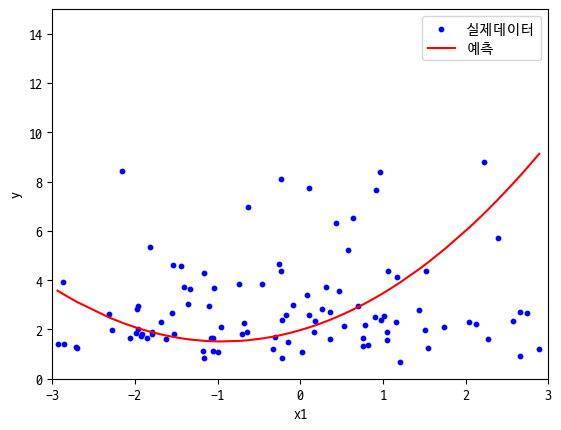

In [160]:
sorted_indexes = np.argsort(X[:,0])
X_sorted = X_ploy[sorted_indexes]
y_predict_sorted = y_predict[sorted_indexes]

plt.scatter(X_sorted[:,0], y, color='blue', s=10, label='실제데이터')
plt.plot(X_sorted[:,0], y_predict_sorted, color='red', label='예측')

plt.xlabel('x1')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(0, 15)
plt.legend()
plt.show()

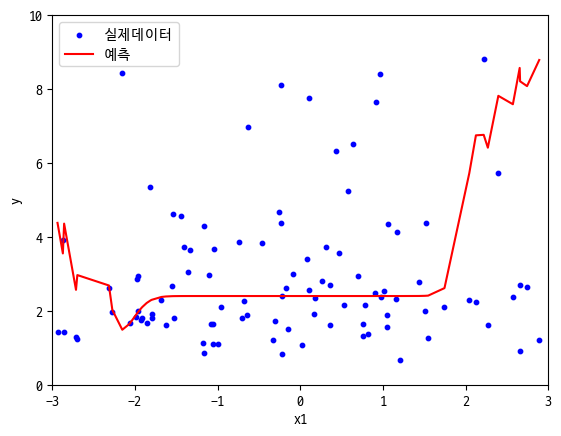

In [161]:
poly_features = PolynomialFeatures(degree=50, include_bias=False)
X_ploy = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_ploy, y)
y_predict = lin_reg.predict(X_ploy)

sorted_indexes = np.argsort(X[:,0])
X_sorted = X_ploy[sorted_indexes]
y_predict_sorted = y_predict[sorted_indexes]

plt.scatter(X_sorted[:,0], y, color='blue', s=10, label='실제데이터')
plt.plot(X_sorted[:,0], y_predict_sorted, color='red', label='예측')

plt.xlabel('x1')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(0, 10)
plt.legend()
plt.show()

학습 곡선을 살펴보고 모델이 과대적합인지 과소적합인지 판단해보자.

In [210]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [215]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='훈련 세트')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='검증 세트')
    plt.xlabel("훈련세트의 크기")
    plt.ylabel('RMSE')
    plt.legend()

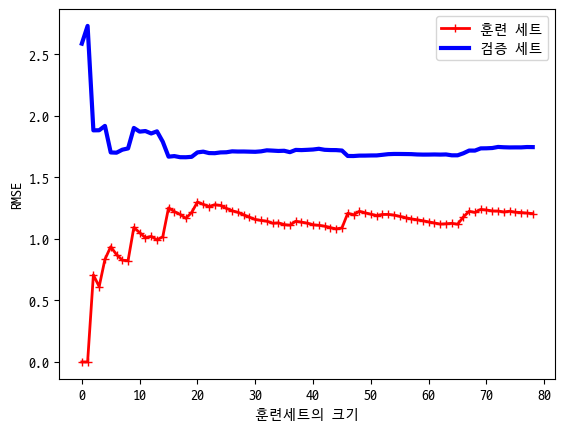

In [216]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

In [204]:
from sklearn.pipeline import Pipeline

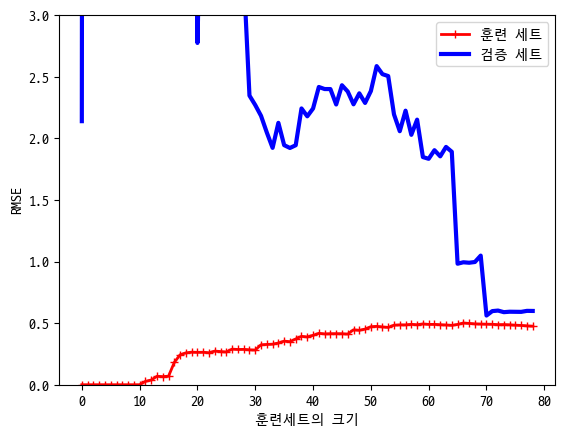

In [223]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0,3)
plt.show()